In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

DB_PATH = "/Users/mimi/Desktop/PYTHON/TURING/HOME/M2/data/mental_health.sqlite"
conn = sqlite3.connect(DB_PATH)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


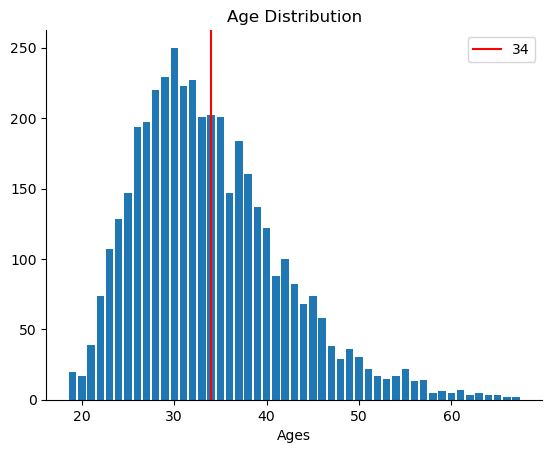

In [19]:
age_count_data = pd.read_sql(
    """ SELECT AnswerText, COUNT(AnswerText) AS occurrances
        FROM Answer 
        WHERE QuestionID IS  1 AND AnswerText > '18'
        GROUP BY AnswerText
        HAVING occurrances > 1;""",
        conn)

age_count_data["AnswerText"] = age_count_data["AnswerText"].astype('int')

x = age_count_data["AnswerText"]
y = age_count_data['occurrances']

age_count_data = pd.read_sql(""" Select AnswerText from Answer WHERE QuestionID IS 1""", conn)
age_count_data.drop(age_count_data[age_count_data.AnswerText == "-1"].index, inplace=True)
age_count_data['AnswerText'] = age_count_data['AnswerText'].astype("int")
age_count_avg = np.average(age_count_data['AnswerText'])

fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0)
plt.title("Age Distribution")
ax.set_xlabel('Ages')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(x=age_count_avg, color='r', linestyle='-', label="Testing" )
ax.legend([round(age_count_avg)])






plt.show()

In [11]:
age_count_avg

33.95680037977688